In [1]:
import roadvision3d
import yaml
import os
import numpy as np
import torch

from roadvision3d.src.datasets.rope3d import Rope3D
from roadvision3d.src.engine.model_builder import build_model

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from roadvision3d.visualization import Visualizer



%load_ext autoreload
%autoreload 2


In [5]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS_Rope3d_150e.yaml'

# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

# build dataloader or load de data manually
data = Rope3D(split='train', cfg=cfg['dataset'])


Resolution init: [1920 1088]


In [7]:
id_num = 6

data_id = data.idx_list[id_num]
img = data.get_image(data_id)
labels = data.get_label(data_id)
calib = data.get_calib(data_id)

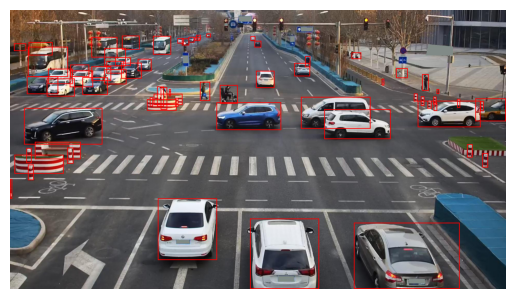

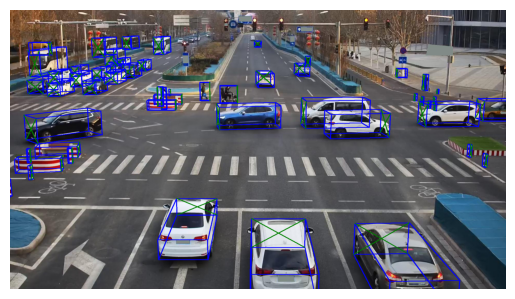

In [12]:
# Initialize the visualizer with calibration data and pitch
visualizer = Visualizer(calib=calib, pitch=0.22)

# Draw 2D bounding boxes on the image
image_with_2d = visualizer.draw_2d_bboxes(img, labels, color='red', width=3, display=True)

# Draw 3D bounding boxes on the image
image_with_3d = visualizer.draw_3d_bboxes(img, labels, color='blue', color_front='green', width=4, display=True)

## Eval results

In [6]:
from roadvision3d.src.datasets.kitti import get_objects_from_label

Resolution init: [1920 1088]


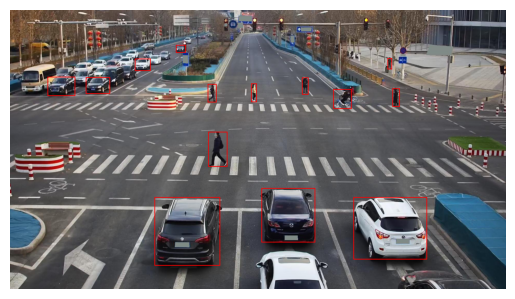

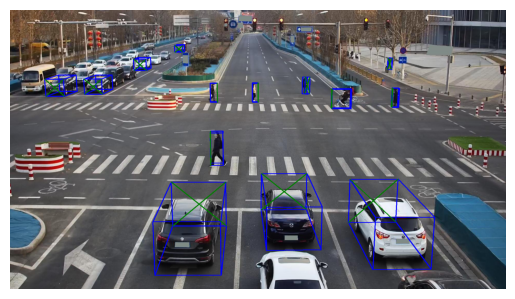

In [7]:
id_test = 564

labels_test_path = f'/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS_DAIR_150e_valid/output/EPOCH_150/data/{id_test:06d}.txt'

labels_test = get_objects_from_label(labels_test_path)

data_test = DAIR(split='val', cfg=cfg['dataset'])
img_test = data_test.get_image(id_test)
calib_test = data_test.get_calib(id_test)

# Initialize the visualizer with calibration data and pitch
eval_visualizer = Visualizer(calib=calib_test, pitch=camera_pitch)

# Draw 2D bounding boxes on the image
image_with_2d = eval_visualizer.draw_2d_bboxes(img_test, labels_test, color='red', width=3, display=True)

# Draw 3D bounding boxes on the image
image_with_3d = eval_visualizer.draw_3d_bboxes(img_test, labels_test, color='blue', color_front='green', width=4, display=True)